In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle



In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.7 MB/s eta 0:00:00


In [6]:
import os
import pandas as pd
from datasets import load_dataset

# Create a directory to store the dataset
os.makedirs("dataset", exist_ok=True)

# Load the dataset from Hugging Face
dataset_name = "infinite-dataset-hub/HumanBotActivityMonitor"
dataset = load_dataset(dataset_name)

# Convert dataset to pandas DataFrame
df = pd.DataFrame(dataset["train"])

# Define the dataset path
dataset_path = "dataset/dataset.csv"

# Save dataset as a CSV file
df.to_csv(dataset_path, index=False)
print(f"Dataset saved successfully at {dataset_path}")

# Verify by loading it back
df_loaded = pd.read_csv(dataset_path)
print("Dataset loaded successfully!")
print(df_loaded.head())  # Display first few rows


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/3.08k [00:00<?, ?B/s]

data.csv:   0%|          | 0.00/14.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/68 [00:00<?, ? examples/s]

Dataset saved successfully at dataset/dataset.csv
Dataset loaded successfully!
   idx user_id session_id Mouse_Movements  Keystrokes  Scroll_Events  \
0    0   12345      abcde            45.2       120.0            5.0   
1    1   67890      fghij            20.1       300.0            3.0   
2    2   24680      klmno              10       100.0            1.0   
3    3   97531      nopqr             5.5        25.0            2.0   
4    4   56789      stuvw            12.5       500.0            0.0   

   Page_Load_Times Click_Events Device_Type   IP_Address  ...  \
0              3.2           15      Mobile  192.168.1.1  ...   
1              4.5           20     Desktop     10.0.0.2  ...   
2              2.0            5      Tablet  192.168.2.2  ...   
3              5.0           30     Desktop     10.0.0.3  ...   
4              3.8           10      Laptop     10.0.0.4  ...   

    Browser_Version Plugins_and_Extensions Screen_Resolution  \
0  Chrome 88.0.4324           AdB

In [7]:
# Display first few rows
display(df.head())

,idx,user_id,session_id,Mouse_Movements,Keystrokes,Scroll_Events,Page_Load_Times,Click_Events,Device_Type,IP_Address,...,Browser_Version,Plugins_and_Extensions,Screen_Resolution,Language_Settings,Geolocation,Time_Based,Operating_System,Hardware_Specifications,VPN_Usage,labels
0,0,12345,abcde,45.2,120.0,5.0,3.2,15,Mobile,192.168.1.1,...,Chrome 88.0.4324,AdBlock Plus,1920x1080,English,35.6421,N35.6421/N35.6421/E35.6421,65,Windows 10,Intel Core i7,No
1,1,67890,fghij,20.1,300.0,3.0,4.5,20,Desktop,10.0.0.2,...,Firefox 83.0,AdBlock Plus,1366x768,Spanish,40.7128,N40.7128/N40.7128/W74.0060,70,macOS Big Sur,Apple M1,Yes
2,2,24680,klmno,10,100.0,1.0,2.0,5,Tablet,192.168.2.2,...,Firefox/79.0,No,1280x800,French,51.5074,N51.5074/W0.1276,60,Linux Mint,AMD Ryzen 5,No
3,3,97531,nopqr,5.5,25.0,2.0,5.0,30,Desktop,10.0.0.3,...,Chrome/88.0.4324,No,1024x768,German,34.0522,-118.2437,55,Windows 10,Intel Core i5,Yes
4,4,56789,stuvw,12.5,500.0,0.0,3.8,10,Laptop,10.0.0.4,...,Chrome/87.0,Yes,1600x900,Japanese,25.0407,N25.0407/E13.0338,80,Ubuntu,Intel Core i3,No


In [ ]:
# Train multiple models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1-score": report['weighted avg']['f1-score']
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(data=results_df, palette='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(results_df.columns)
plt.show()



In [ ]:
# Save best model
best_model_name = results_df['accuracy'].idxmax()
best_model = models[best_model_name]

with open("detectmodel.pkl", "wb") as f:
    pickle.dump(best_model, f)



In [ ]:
print(f"Best model '{best_model_name}' saved as detectmodel.pkl")

Using 'labels' as the label column.
Training RandomForest...
Training SVM...
Training MLP...
Training KNN...
Training GradientBoosting...
Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:09:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LogisticRegression...


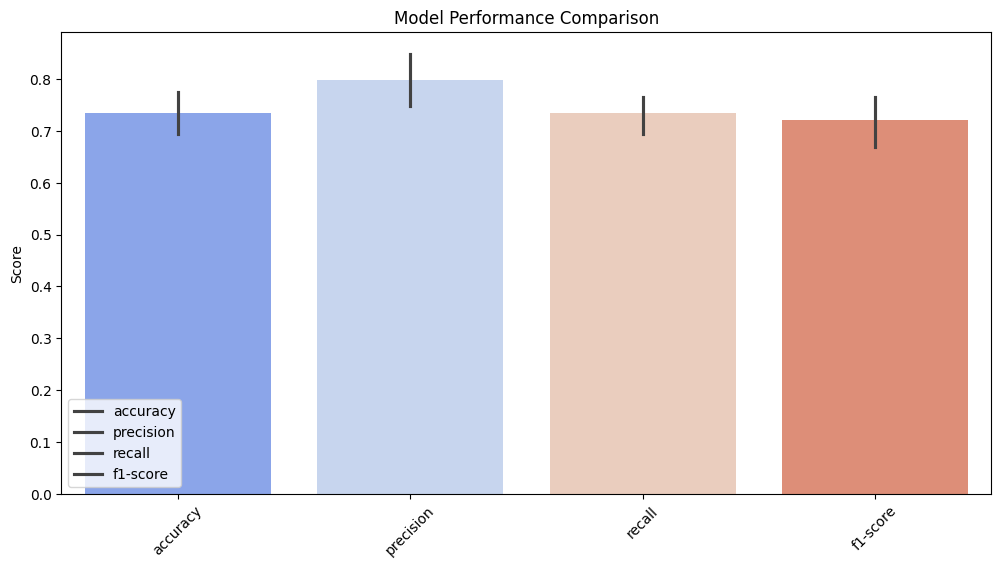

✅ Best model 'RandomForest' saved as detectmodel.pkl 🚀


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create dataset directory
os.makedirs("dataset", exist_ok=True)

# Load dataset (ensure the dataset is available)
dataset_path = "dataset/dataset.csv"
df = pd.read_csv(dataset_path)

# Identify label column dynamically
possible_label_columns = ["label", "target", "class", "is_bot", "bot", "labels"]
label_column = next((col for col in possible_label_columns if col in df.columns), None)

if label_column is None:
    raise KeyError(f"Label column not found! Available columns: {list(df.columns)}")

print(f"Using '{label_column}' as the label column.")


# Encode labels
if df[label_column].dtype == object:
    label_encoder = LabelEncoder()
    df[label_column] = label_encoder.fit_transform(df[label_column])

# Split data into features (X) and target labels (y)
X = df.drop(columns=[label_column], errors="ignore")
y = df[label_column]

# Convert all non-numeric columns to numeric using Label Encoding or One-Hot Encoding
for col in X.columns:
    if X[col].dtype == 'object':  # If the column is categorical
        try:
            X[col] = LabelEncoder().fit_transform(X[col])  # Try Label Encoding
        except:
            X = pd.get_dummies(X, columns=[col])  # Fallback to One-Hot Encoding

# Handle missing values
X.fillna(X.mean(), inplace=True)  # Now, this should work without errors

# **Fixed issue here (Complete statement)**
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "GradientBoosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "LogisticRegression": LogisticRegression(max_iter=500)
}

results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        "accuracy": acc,
        "precision": report['weighted avg']['precision'],
        "recall": report['weighted avg']['recall'],
        "f1-score": report['weighted avg']['f1-score']
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Plot model comparison
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, palette='coolwarm')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(results_df.columns)
plt.show()

# Save the best model
best_model_name = results_df['accuracy'].idxmax()
best_model = models[best_model_name]

with open("detectmodel.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"✅ Best model '{best_model_name}' saved as detectmodel.pkl 🚀")
